In [97]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [2]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-07 12:49:11--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3.79M  38.4KB/s    in 1m 47s  

2019-04-07 12:50:58 (36.4 KB/s) - ‘adult.data.1’ saved [3974305/3974305]



In [3]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [98]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [99]:
df = pd.read_csv('adult.data', names=cols, sep=', ')

In [100]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [101]:
df.describe().drop('count')

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Сколько мужчин и женщин?

In [102]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [103]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [104]:
(df['native-country'] == 'United-States').sum() / len(df)

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

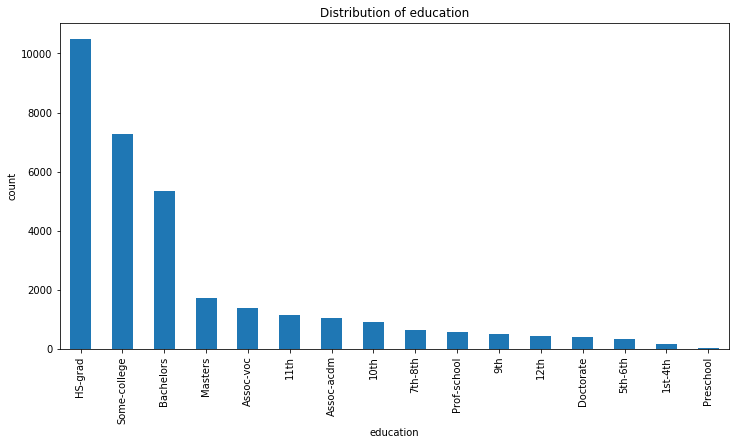

In [105]:
eds = df.groupby('education').size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
eds.plot.bar();
plt.ylabel('count')
plt.title('Distribution of education');

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

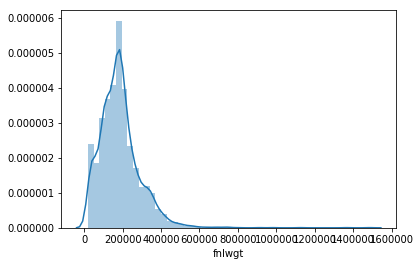

In [106]:
weight = df[df['marital-status'] == 'Divorced']['fnlwgt']

sns.distplot(weight);

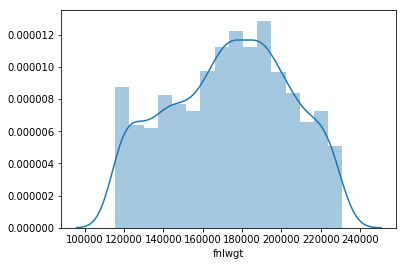

In [107]:
# Убираем выбросы
IQR = weight.quantile(.75) - weight.quantile(.75)
right_border = weight.quantile(.75) + 1.5 * IQR
left_border = weight.quantile(.25) - 1.5 * IQR

weight = weight[(weight < right_border) & (weight > left_border)]
sns.distplot(weight, );


> Ответ: оно мне напоминает **Распределение Рэлея** или **Бета** распределение

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [108]:
university = df[df['result'] == '>50K']['education'].isin(['Bachelors', 'Masters', 'Doctorate']).sum()
all_ = len(df[df['result'] == '>50K']['education'])

In [109]:
print(f'{(university * 100 / all_).round(2)} процентов из всех, кто получает больше 50к, с высшим образованием')

44.46 процентов из всех, кто получает больше 50к, с высшим образованием


> Ответ: Неправда.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [110]:
df.groupby('education')['hours-per-week'].mean().sort_values(ascending=False)

education
Prof-school     47.425347
Doctorate       46.973366
Masters         43.836332
Bachelors       42.614006
Assoc-voc       41.610709
HS-grad         40.575374
Assoc-acdm      40.504217
7th-8th         39.366873
5th-6th         38.897898
Some-college    38.852284
1st-4th         38.255952
9th             38.044747
10th            37.052519
Preschool       36.647059
12th            35.780600
11th            33.925957
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [111]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

> Ответ: **Мужчины**

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [112]:
df['relationship'].unique()

array(['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [113]:
in_relation = df[df['relationship'].isin(['Husband', 'Wife'])]['hours-per-week'].mean().round(2)
not_in_relation = df[df['relationship'].isin(['Not-in-family', 'Unmarried'])]['hours-per-week'].mean().round(2)

print(f'In relations: {in_relation}, not in relations: {not_in_relation}')

In relations: 43.35, not in relations: 40.16


> Ответ: Те кто в отношениях.

# Из каких стран люди работают farmers/fishers?

In [115]:
df[df['occupation'] == 'Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [116]:
maxh = df['hours-per-week'].max()

print(f"Максимум в неделю работают {maxh} часов")

Максимум в неделю работают 99 часов


In [117]:
npeople = df[df['hours-per-week'] == df['hours-per-week'].max()]

print(f"{len(npeople)} людей работают по {maxh} часов")

85 людей работают по 99 часов


In [118]:
df[df['hours-per-week'] == df['hours-per-week'].max()]['result'].value_counts()

<=50K    60
>50K     25
Name: result, dtype: int64